In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Impute empty fields

train = train.fillna(train.mean(axis = 0), axis = 0)
test = test.fillna(test.mean(axis = 0), axis = 0)

train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [7]:
# Encoding categorial features

from sklearn.preprocessing import LabelEncoder

categorical_mask = train.dtypes == object
categorical_cols = train.columns[categorical_mask].tolist()

# Drop NaN columns
for col in categorical_cols:
    nan_coef = train[col].isnull().sum() / train.shape[0]
    
    if nan_coef > 0.4:
        train = train.drop([col], axis = 1)
        test = test.drop([col], axis = 1)

# Drop NaN rows
train = train.dropna()
train = train.reset_index(drop=True)

test = test.fillna(method='bfill')

# Encoding
categorical_mask = train.dtypes == object
categorical_cols = train.columns[categorical_mask].tolist()

for col in categorical_cols:
    train_encoder = LabelEncoder()
    train_encoder.fit(train[col])
    train[col] = train_encoder.transform(train[col])
    
    test_encoder = LabelEncoder()
    test_encoder.fit(test[col])
    test[col] = test_encoder.transform(test[col])
    
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [8]:
train['LotAreaLog'] =  np.log1p(train['LotArea'])
test['LotAreaLog'] =  np.log1p(test['LotArea'])

train['LandSlopeLog'] =  np.log1p(train['LandSlope'])
test['LandSlopeLog'] =  np.log1p(test['LandSlope'])

train['OverallQualLog'] =  np.log1p(train['OverallQual'])
test['OverallQualLog'] =  np.log1p(test['OverallQual'])

train['GrLivAreaLog'] =  np.log1p(train['GrLivArea'])
test['GrLivAreaLog'] =  np.log1p(test['GrLivArea'])

train['GarageCarsLog'] =  np.log1p(train['GarageCars'])
test['GarageCarsLog'] =  np.log1p(test['GarageCars'])

train['SalePriceLog'] =  np.log1p(train['SalePrice'])

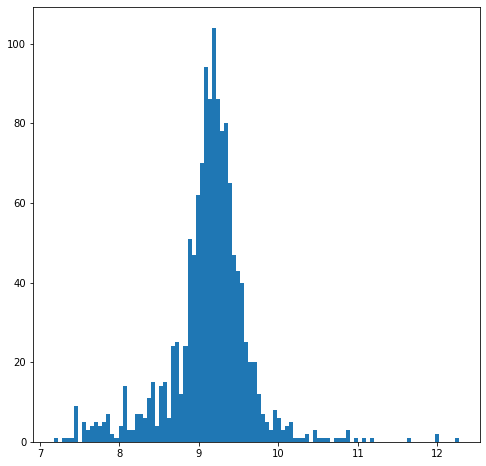

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize= (8,8))
plt.hist(train['LotAreaLog'], bins = 100)
plt.show()

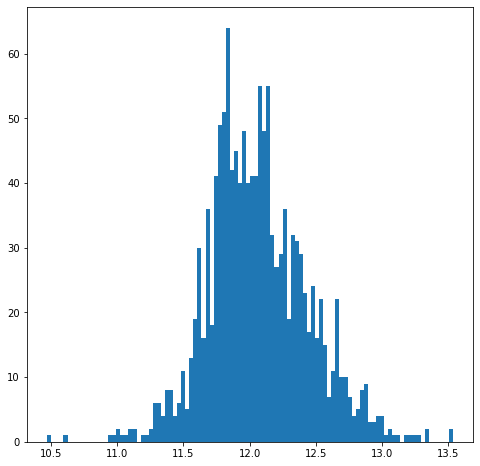

In [10]:
plt.figure(figsize= (8,8))
plt.hist(train['SalePriceLog'], bins = 100)
plt.show()

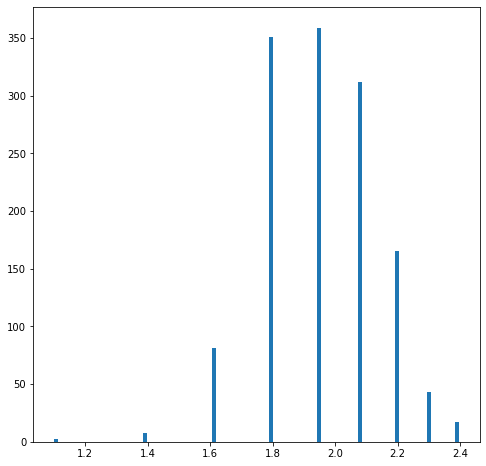

In [11]:
plt.figure(figsize= (8,8))
plt.hist(train['OverallQualLog'], bins = 100)
plt.show()

In [12]:
# Outliers removement

from scipy import stats

min_thresold = train['LotAreaLog'].quantile(0.05)
max_thresold = train['LotAreaLog'].quantile(0.95)

train = train[(train['LotAreaLog'] > min_thresold) & (train['LotAreaLog'] < max_thresold)]
train = train.reset_index(drop=True)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,LotAreaLog,LandSlopeLog,OverallQualLog,GrLivAreaLog,GarageCarsLog,SalePriceLog
0,1,60,3,65.0,8450,1,3,3,0,4,...,2008,8,4,208500,9.042040,0.0,2.079442,7.444833,1.098612,12.247699
1,2,20,3,80.0,9600,1,3,3,0,2,...,2007,8,4,181500,9.169623,0.0,1.945910,7.141245,1.098612,12.109016
2,3,60,3,68.0,11250,1,0,3,0,4,...,2008,8,4,223500,9.328212,0.0,2.079442,7.488294,1.098612,12.317171
3,4,70,3,60.0,9550,1,0,3,0,0,...,2006,8,0,140000,9.164401,0.0,2.079442,7.448916,1.386294,11.849405
4,5,60,3,84.0,14260,1,0,3,0,2,...,2008,8,4,250000,9.565284,0.0,2.197225,7.695758,1.386294,12.429220


In [13]:
# Min-Max normalization

from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

train[train.columns[:-1]] = scaler_x.fit_transform(train.iloc[:, :-1])
train[['SalePriceLog']] = scaler_y.fit_transform(train[['SalePriceLog']])

test[test.columns] = scaler_x.fit_transform(test)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,LotAreaLog,LandSlopeLog,OverallQualLog,GrLivAreaLog,GarageCarsLog,SalePriceLog
0,0.000000,0.235294,0.75,0.230263,0.361881,1.0,1.0,1.0,0.0,1.0,...,0.50,1.0,0.8,0.244035,0.562247,0.0,0.754900,0.585793,0.442507,0.582363
1,0.000685,0.000000,0.75,0.328947,0.442941,1.0,1.0,1.0,0.0,0.5,...,0.25,1.0,0.8,0.205990,0.638948,0.0,0.652127,0.455061,0.442507,0.536881
2,0.001371,0.235294,0.75,0.250000,0.559244,1.0,0.0,1.0,0.0,1.0,...,0.50,1.0,0.8,0.265171,0.734291,0.0,0.754900,0.604508,0.442507,0.605147
3,0.002056,0.294118,0.75,0.197368,0.439416,1.0,0.0,1.0,0.0,0.0,...,0.00,1.0,0.0,0.147514,0.635809,0.0,0.754900,0.587551,0.756471,0.451739
4,0.002742,0.235294,0.75,0.355263,0.771410,1.0,0.0,1.0,0.0,0.5,...,0.50,1.0,0.8,0.302511,0.876816,0.0,0.845553,0.693847,0.756471,0.641895


In [14]:
# Features selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = train.iloc[:, 0:train.shape[1]-1]
y = train.iloc[:,-1]

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = f_regression, k = 10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))  #print 10 best features


             Specs         Score
75       SalePrice  13655.584403
16     OverallQual   2666.773097
78  OverallQualLog   2404.516126
79    GrLivAreaLog   1355.939965
45       GrLivArea   1310.921588
59      GarageCars    941.975304
80   GarageCarsLog    887.723397
26       ExterQual    836.437324
48        FullBath    815.988482
18       YearBuilt    815.135798


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error

kf = KFold(n_splits = 5)
rmse_list = []

model = LinearRegression()

for i, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'LandSlopeLog']], train.loc[test_index, ['LotAreaLog', 'LandSlopeLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']
    
    model.fit(X_train, y_train)
    
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict, y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

0 0.10807622860289937
1 0.11489673533435434
2 0.11540343519719924
3 0.11319234374965431
4 0.11109513802276028
Mean rmse for 5-fold: 0.11253277618137351
std rmse for 5-fold: 0.0026904139173568008


In [16]:
model.fit(train[['LotAreaLog', 'LandSlopeLog']], train['SalePriceLog'])

prediction = model.predict(test[['LotAreaLog', 'LandSlopeLog']])
sample_submission = sample_submission.loc[:prediction.shape[0]-1, :]

sample_submission.loc[:, 'SalePrice'] = scaler_y.inverse_transform([prediction])[0]
sample_submission['SalePrice'] = np.exp(sample_submission['SalePrice']) - 1

sample_submission.head()

,Id,SalePrice
0,1461,166221.780113
1,1462,173522.628207
2,1463,172394.678872
3,1464,160991.372098
4,1465,139313.255317


In [17]:
sample_submission.to_csv('submission.csv', index = None)

In [18]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

for i, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'LandSlopeLog']], train.loc[test_index, ['LotAreaLog', 'LandSlopeLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']
    
    model.fit(X_train, y_train)
    
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict, y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

0 0.10803542912011502
1 0.11482386064967068
2 0.11448829124239032
3 0.11319462961569748
4 0.11068763878302859
Mean rmse for 5-fold: 0.11238937303177696
std rmse for 5-fold: 0.002629216810608013


In [19]:
model.fit(train[['LotAreaLog', 'LandSlopeLog']], train['SalePriceLog'])

prediction = model.predict(test[['LotAreaLog', 'LandSlopeLog']])
sample_submission = sample_submission.loc[:prediction.shape[0]-1, :]

sample_submission.loc[:, 'SalePrice'] = scaler_y.inverse_transform([prediction])[0]
sample_submission['SalePrice'] = np.exp(sample_submission['SalePrice']) - 1

sample_submission.head()

,Id,SalePrice
0,1461,166056.422664
1,1462,172985.799966
2,1463,171916.188146
3,1464,161083.012374
4,1465,140382.446727


In [20]:
sample_submission.to_csv('submission.csv', index = None)

In [21]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

for i, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'OverallQualLog']], train.loc[test_index, ['LotAreaLog', 'OverallQualLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']
    
    model.fit(X_train, y_train)
    
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict, y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

0 0.0835938530838616
1 0.09023682869850458
2 0.08911335131620747
3 0.08534610111663245
4 0.08213450421340392
Mean rmse for 5-fold: 0.10362122458309199
std rmse for 5-fold: 0.012713004946653754


In [22]:
model.fit(train[['LotAreaLog', 'OverallQualLog']], train['SalePriceLog'])

prediction = model.predict(test[['LotAreaLog', 'OverallQualLog']])
sample_submission = sample_submission.loc[:prediction.shape[0]-1, :]

sample_submission.loc[:, 'SalePrice'] = scaler_y.inverse_transform([prediction])[0]
sample_submission['SalePrice'] = np.exp(sample_submission['SalePrice']) - 1

sample_submission.head()

,Id,SalePrice
0,1461,168389.804541
1,1462,186492.092268
2,1463,172575.923158
3,1464,177311.894049
4,1465,181233.899951


In [23]:
sample_submission.to_csv('submission.csv', index = None)

In [24]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

for i, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog']], train.loc[test_index, ['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']
    
    model.fit(X_train, y_train)
    
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict, y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

0 0.07516242647899057
1 0.08046835770045949
2 0.08041718732560069
3 0.07615680612045217
4 0.07514647215880933
Mean rmse for 5-fold: 0.0970834809265346
std rmse for 5-fold: 0.015841333854515926


In [25]:
model.fit(train[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog']], train['SalePriceLog'])

prediction = model.predict(test[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog']])
sample_submission = sample_submission.loc[:prediction.shape[0]-1, :]

sample_submission.loc[:, 'SalePrice'] = scaler_y.inverse_transform([prediction])[0]
sample_submission['SalePrice'] = np.exp(sample_submission['SalePrice']) - 1

sample_submission.head()

,Id,SalePrice
0,1461,152851.393607
1,1462,180677.442599
2,1463,176398.807490
3,1464,180165.688529
4,1465,175691.784964


In [26]:
sample_submission.to_csv('submission.csv', index = None)

In [27]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

for i, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog', 'GarageCarsLog']], train.loc[test_index, ['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog', 'GarageCarsLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']
    
    model.fit(X_train, y_train)
    
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict, y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

0 0.06531382114189983
1 0.06859871509921105
2 0.07262029944774713
3 0.06572865813859385
4 0.06605304359233345
Mean rmse for 5-fold: 0.0911993662380191
std rmse for 5-fold: 0.01845918783962338


In [28]:
model.fit(train[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog', 'GarageCarsLog']], train['SalePriceLog'])

prediction = model.predict(test[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog', 'GarageCarsLog']])
sample_submission = sample_submission.loc[:prediction.shape[0]-1, :]

sample_submission.loc[:, 'SalePrice'] = scaler_y.inverse_transform([prediction])[0]
sample_submission['SalePrice'] = np.exp(sample_submission['SalePrice']) - 1

sample_submission.head()

,Id,SalePrice
0,1461,155808.279560
1,1462,180473.830920
2,1463,193945.572885
3,1464,197230.376265
4,1465,192265.375134


In [29]:
sample_submission.to_csv('submission.csv', index = None)

In [30]:
# Average of responses

model = SGDRegressor()
model.fit(train[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog', 'GarageCarsLog']], train['SalePriceLog'])

prediction1 = model.predict(test[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog', 'GarageCarsLog']])

model = SGDRegressor()
model.fit(train[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog']], train['SalePriceLog'])

prediction2 = model.predict(test[['LotAreaLog', 'OverallQualLog', 'GrLivAreaLog']])

model = SGDRegressor()
model.fit(train[['LotAreaLog', 'OverallQualLog']], train['SalePriceLog'])

prediction3 = model.predict(test[['LotAreaLog', 'OverallQualLog']])

model = SGDRegressor()
model.fit(train[['LotAreaLog', 'LandSlopeLog']], train['SalePriceLog'])

prediction4 = model.predict(test[['LotAreaLog', 'LandSlopeLog']])

prediction1 = np.exp(scaler_y.inverse_transform([prediction1])[0]) - 1
prediction2 = np.exp(scaler_y.inverse_transform([prediction2])[0]) - 1
prediction3 = np.exp(scaler_y.inverse_transform([prediction3])[0]) - 1
prediction4 = np.exp(scaler_y.inverse_transform([prediction4])[0]) - 1

prediction = []

for i in range(len(prediction1)):
    prediction.append((prediction1[i] + prediction2[i] + prediction3[i] + prediction4[i]) / 4)
    
sample_submission['SalePrice'] = prediction

sample_submission.head()

,Id,SalePrice
0,1461,160714.076415
1,1462,180103.586687
2,1463,178738.649925
3,1464,178950.517397
4,1465,172341.225858


In [31]:
sample_submission.to_csv('submission.csv', index = None)

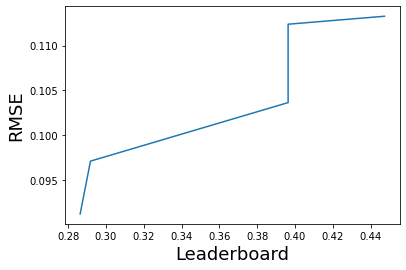

In [32]:
# Dependence of cross-validation and leaderboard metric

cross_validation_rates = [0.11328, 0.11239, 0.10363, 0.09709, 0.09119]
leaderboard_rates = [0.44740, 0.39638, 0.31303, 0.29179, 0.28634]

metrics = np.arange(0.0, 1.0, 0.01)

plt.plot(leaderboard_rates, cross_validation_rates)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('Leaderboard', fontsize=18)
plt.show()